In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from Graph import Graph
import networkx as nx
from wordcloud import WordCloud

data = pd.read_csv('../Datasets/StackOverflowData.csv')
data.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [27]:
df_nodes = data['source'].unique().tolist()
df_edges = pd.read_csv('../Datasets/StackOverflowData.csv')
graph = {key: [] for key in df_nodes}
for node_1, node_2, value in df_edges.values.tolist():
    graph[node_1].append({'node': node_2, 'value': value})

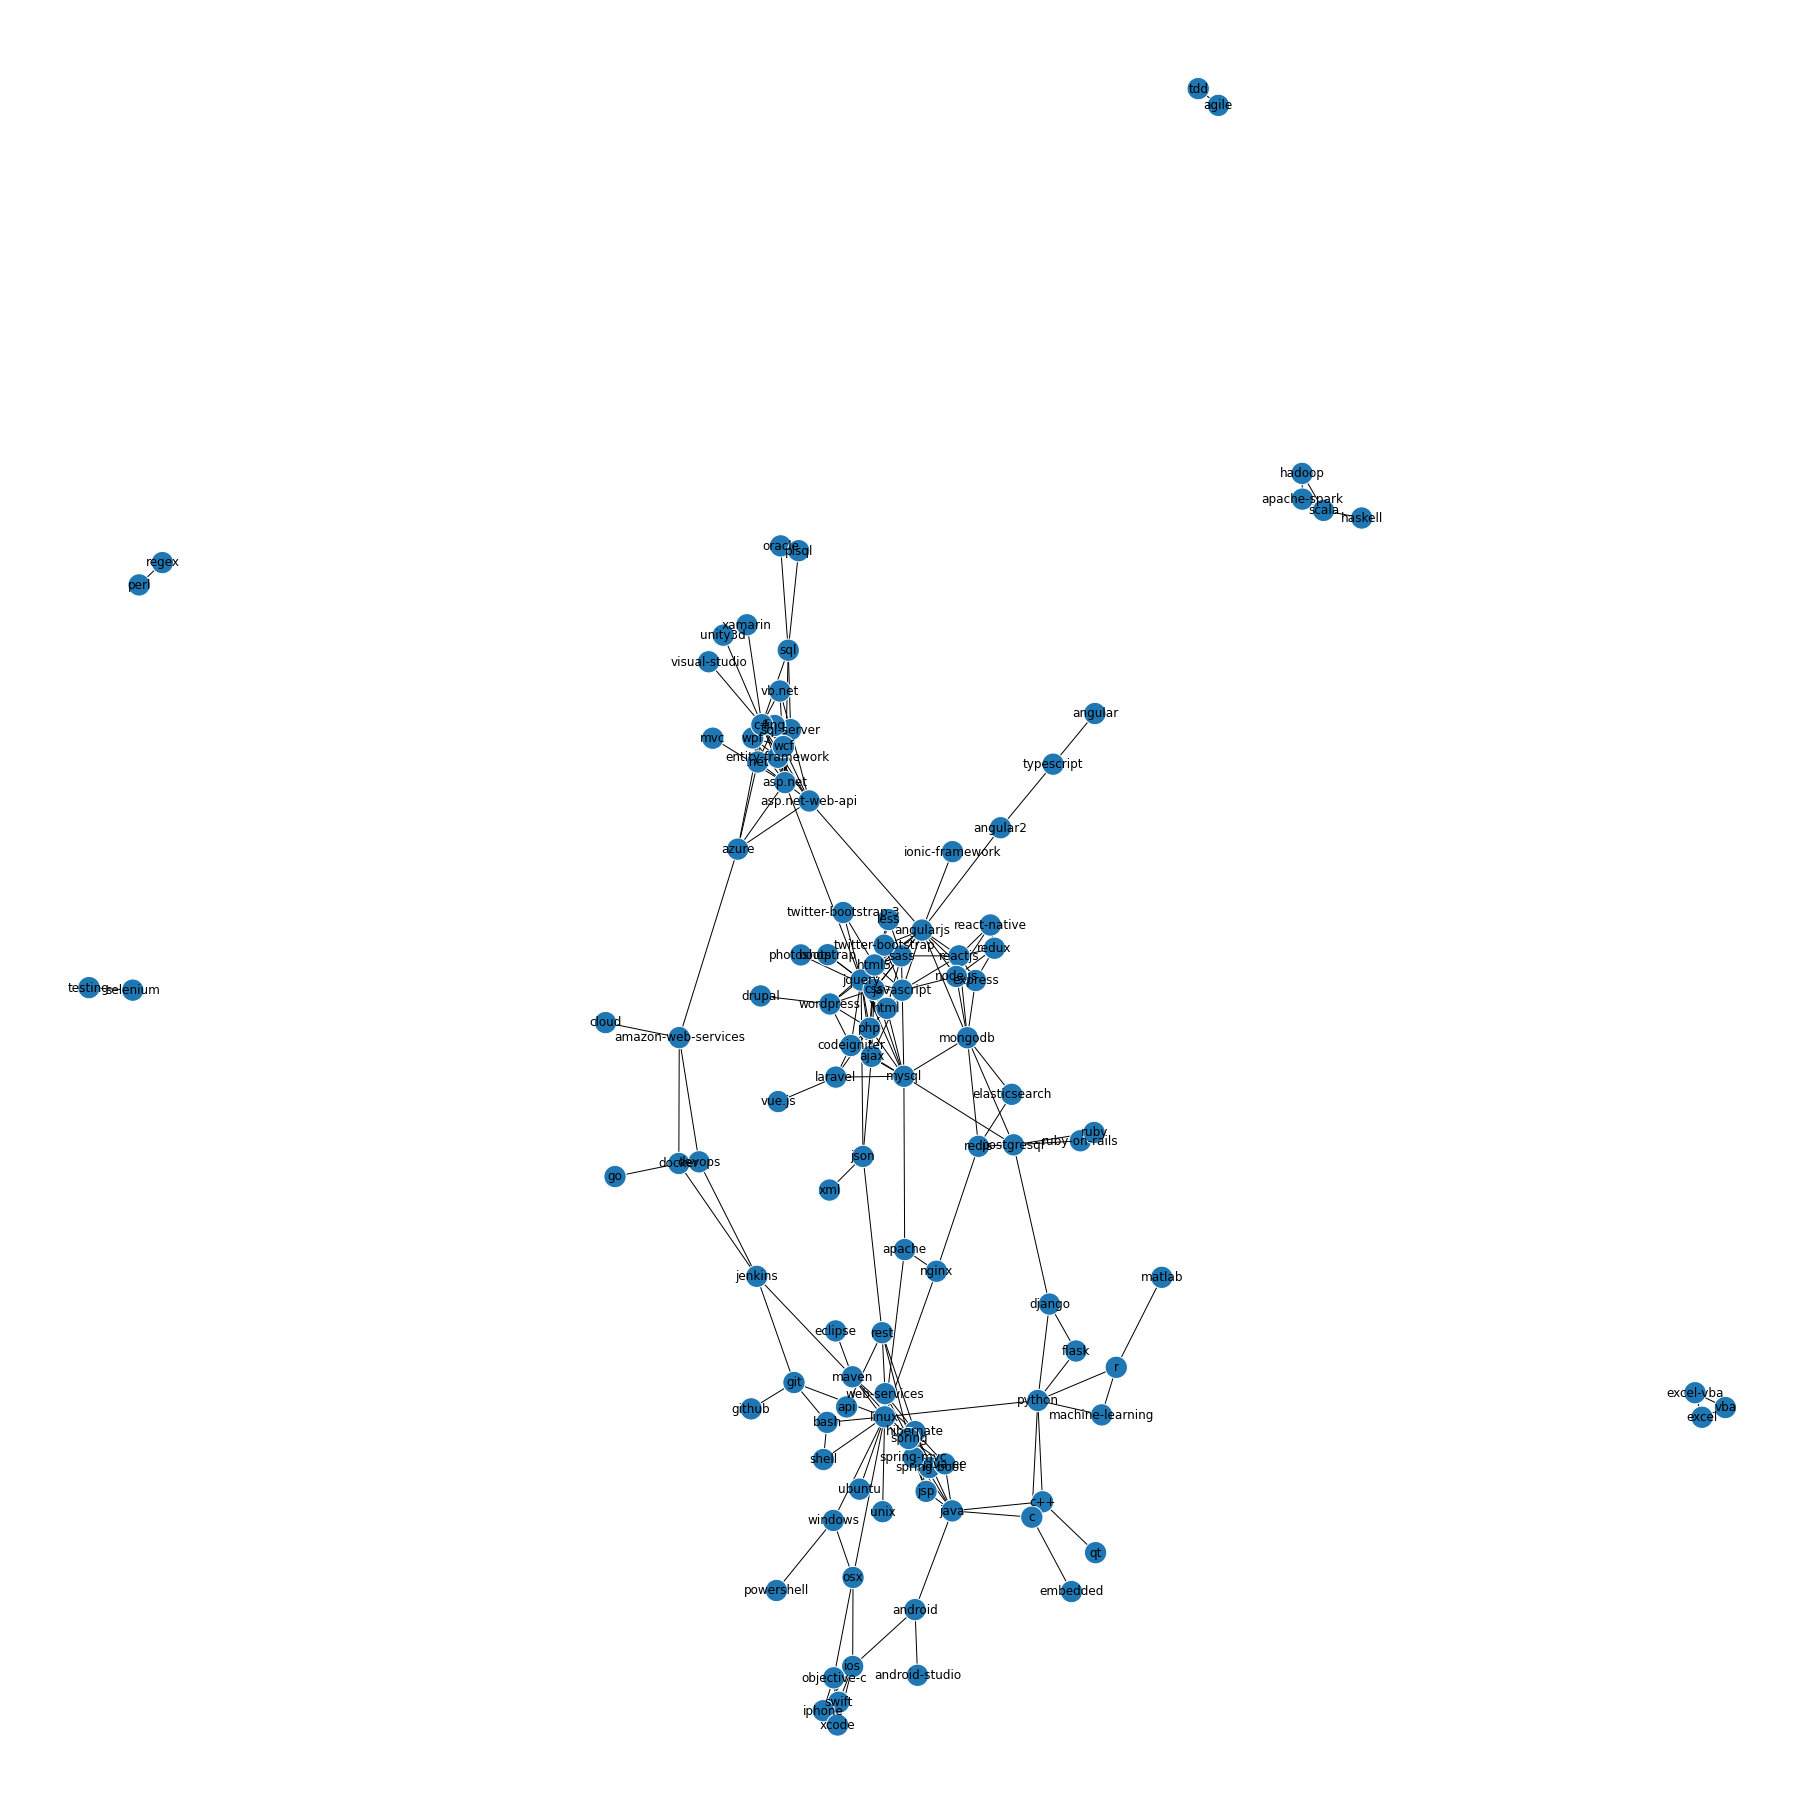

In [28]:
G = nx.Graph(day="Stackoverflow")
#for index, row in df_nodes.iterrows():
    #G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
#color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
#             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
#             13:'#d6dcff', 14:'#d2f5f0'}

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#000',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
#colors = [color_map[G.node[node]['group']] for node in G]
sizes = [500 for node in G]

nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#FFFFFF") 
plt.show()

## Nuvem de Assuntos

Abaixo está representada uma lista de assuntos comentados no Stack Overflow para que se possa utilizar o exemplo que vem a seguir.

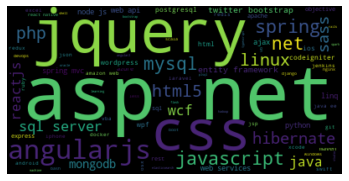

In [29]:
subject = data.source.values
wc = WordCloud().generate(str(subject).replace('\'', ''))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## BFS para busca de conexões com uma assunto específico

Insira abaixo o nome do assunto que deseja procurar correlações:

In [48]:
target = input()

asp.net


In [49]:
def BFS(G, target):
    visited = []
    queue = []
    queue.append(target)
    visited.append(target)
    while queue:
        u = queue.pop(0)
        for v in G[u]:
            if v['node'] not in visited:
                queue.append(v['node'])
                visited.append(v['node'])
    print(visited)

In [50]:
BFS(graph, target)

['asp.net', '.net', 'asp.net-web-api', 'azure', 'c#', 'entity-framework', 'jquery', 'linq', 'mvc', 'sql', 'sql-server', 'vb.net', 'wcf', 'wpf', 'angularjs', 'amazon-web-services', 'unity3d', 'visual-studio', 'xamarin', 'ajax', 'bootstrap', 'codeigniter', 'css', 'html', 'html5', 'javascript', 'json', 'mysql', 'php', 'sass', 'twitter-bootstrap', 'twitter-bootstrap-3', 'wordpress', 'oracle', 'plsql', 'angular2', 'express', 'ionic-framework', 'mongodb', 'node.js', 'reactjs', 'cloud', 'devops', 'docker', 'laravel', 'less', 'photoshop', 'rest', 'xml', 'apache', 'postgresql', 'drupal', 'typescript', 'redux', 'elasticsearch', 'redis', 'react-native', 'jenkins', 'go', 'vue.js', 'api', 'hibernate', 'spring', 'web-services', 'linux', 'nginx', 'django', 'ruby', 'ruby-on-rails', 'angular', 'git', 'maven', 'java', 'java-ee', 'jsp', 'spring-boot', 'spring-mvc', 'bash', 'osx', 'python', 'shell', 'ubuntu', 'unix', 'windows', 'flask', 'github', 'eclipse', 'android', 'c', 'c++', 'ios', 'objective-c', 'ma